In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import scipy as sp
import scipy.stats as st
import pymc3 as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt

/home/sunild/anaconda3/lib/python3.8/site-packages/matplotlib_inline/config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 4 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.47,0.124,0.245,0.707,0.002,0.001,5079.0,7867.0,1.0


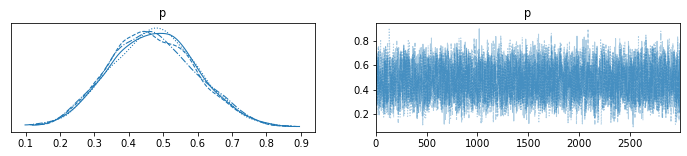

In [3]:
with pm.Model() as mod:
    p = pm.Beta('p', 2, 3)
    w = pm.Binomial('w',n=10, p=p, observed=5)
    trc=pm.sample(3000,tune=1000)
az.plot_trace(trc)  
az.summary(trc)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 5 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,4.19,0.622,3.035,5.362,0.008,0.006,5765.0,8143.0,1.0


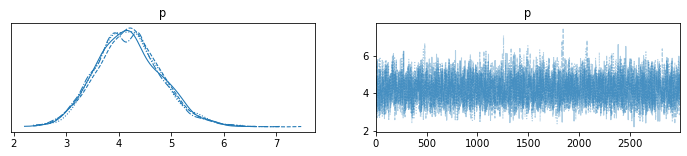

In [9]:
with pm.Model() as mod:
    p = pm.Gamma('p', 1, 1)
    w = pm.Poisson('w', mu=p, observed=np.random.poisson(lam=6,size=10))
    trc=pm.sample(3000,tune=1000)
az.plot_trace(trc)  
az.summary(trc)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 4 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,11.937,0.099,11.747,12.121,0.001,0.001,4853.0,7764.0,1.0


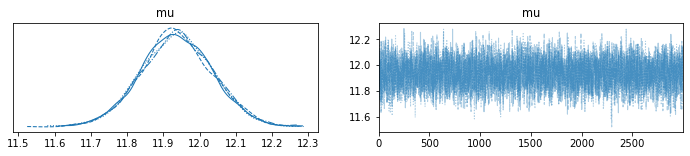

In [5]:
with pm.Model() as mod:
    mu = pm.Normal('mu',mu=0,sigma=1)
    w = pm.Normal('w', mu=mu, sigma=1,observed=np.random.normal(loc=12,scale=2,size=100))
    trc=pm.sample(3000,tune=1000)
az.plot_trace(trc)  
az.summary(trc)

In [7]:
with pm.Model() as m1:
    theta_1=pm.Beta('theta_1',alpha=1,beta=1)
    theta_2=pm.Beta('theta_2',alpha=1,beta=1)
    lik1=pm.Binomial('lik1',n=50,p=theta_1,observed=23)
    lik2=pm.Binomial('lik2',n=50,p=theta_2,observed=34)
    samaples=pm.sample(draws=4000,tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta_2, theta_1]


Sampling 4 chains for 500 tune and 4_000 draw iterations (2_000 + 16_000 draws total) took 5 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'theta_1'}>,
        <AxesSubplot:title={'center':'theta_1'}>],
       [<AxesSubplot:title={'center':'theta_2'}>,
        <AxesSubplot:title={'center':'theta_2'}>]], dtype=object)

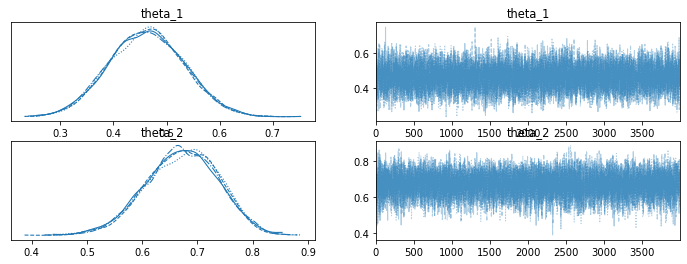

In [10]:
az.plot_trace(samaples)

In [12]:
az.summary(samaples)

Got error No model on context stack. trying to find log_likelihood in translation.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta_1,0.463,0.070,0.335,0.594,0.001,0.0,14650.0,10433.0,1.0
theta_2,0.672,0.065,0.553,0.794,0.001,0.0,14698.0,11245.0,1.0
